In [10]:
from matplotlib import pyplot as plt
from matplotlib import cm
from math import log10
import operator
import numpy as np
import os
import math
import csv

In [11]:
articlePaths = ['.\\TOM_Dataset\\TOM_Dataset_Inset\\Article_Information.csv', '.\\TOM_Dataset\\TOM_Dataset_Business\\Article_Information.csv', '.\\TOM_Dataset\\TOM_Dataset_National\\Article_Information.csv', '.\\TOM_Dataset\\TOM_Dataset_Opinion\\Article_Information.csv', '.\\TOM_Dataset\\TOM_Dataset_Sport\\Article_Information.csv', '.\\TOM_Dataset\\TOM_Dataset_World\\Article_Information.csv']
imagePaths = ['.\\TOM_Dataset\\TOM_Dataset_Inset\\Image_Information.csv', '.\\TOM_Dataset\\TOM_Dataset_Business\\Image_Information.csv', '.\\TOM_Dataset\\TOM_Dataset_National\\Image_Information.csv', '.\\TOM_Dataset\\TOM_Dataset_Opinion\\Image_Information.csv', '.\\TOM_Dataset\\TOM_Dataset_Sport\\Image_Information.csv', '.\\TOM_Dataset\\TOM_Dataset_World\\Image_Information.csv']

In [12]:
def countInsets(data):
    print(data)
    insetCounter = 0
    with open(data, newline='') as csvfile:
        spamreader = csv.reader(csvfile)
        for row in spamreader:
            if row[3] == "True":
                insetCounter += 1
    return insetCounter

In [13]:
for path in imagePaths:
    countInsets(path)

.\TOM_Dataset\TOM_Dataset_Inset\Image_Information.csv
.\TOM_Dataset\TOM_Dataset_Business\Image_Information.csv
.\TOM_Dataset\TOM_Dataset_National\Image_Information.csv
.\TOM_Dataset\TOM_Dataset_Opinion\Image_Information.csv
.\TOM_Dataset\TOM_Dataset_Sport\Image_Information.csv
.\TOM_Dataset\TOM_Dataset_World\Image_Information.csv


In [14]:
def categoriesDictionary(data):
    print(data)
    categoryCounts = {}
    with open(data, newline='') as csvfile:
        spamreader = csv.reader(csvfile)
        next(spamreader)
        for row in spamreader:
            for category in row[4].split(','):
                categoryCounts[category] = categoryCounts.get(category, 0) + 1
    categoryCounts = sorted(categoryCounts.items(), key=operator.itemgetter(1), reverse=True)

    print(categoryCounts)
    return categoryCounts

In [15]:
articleInformation = {}

for path in articlePaths:
    articleInformation[path] = categoriesDictionary(path)

.\TOM_Dataset\TOM_Dataset_Inset\Article_Information.csv
[('National', 43), ('Community', 10), ('History', 8), ('Murder', 7), ('Court', 7), ('Crime', 5), ('Construction', 5), ('Police', 5), ('FIAU', 4), ('Economy', 4), ('Gaming', 4), ('Business', 3), ('Yorgen Fenech', 3), ('Society', 3), ('Planning Authority', 3), ('Maritime', 2), ('Opinion', 2), ('Letters', 2), ('Government', 2), ('World', 2), ('Greece', 2), ('Tourism', 2), ('Charity', 2), ('Children', 2), ('Disability', 2), ('Buġibba', 2), ('Tech', 2), ('Architecture', 2), ('COVID-19', 2), ('Books', 2), ('Russia', 2), ('Art', 2), ('Mqabba', 2), ('Adrian Delia', 2), ('PN', 2), ('President of Malta', 2), ('Accident', 2), ('Gozo', 2), ('Environment', 1), ('Mosta', 1), ('War', 1), ('Features', 1), ('Media', 1), ('Politics', 1), ('Analysis', 1), ('St Paul’s Bay', 1), ('Justice', 1), ('Royal Family', 1), ('Hospitals deal', 1), ('Diplomacy', 1), ('Electrogas', 1), ('Daphne Caruana Galizia', 1), ('Libya', 1), ('Ħamrun', 1)]
.\TOM_Dataset\TOM_

In [16]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Sample data: categories and their frequencies
# categories = ['Politics', 'Sports', 'Technology', 'Entertainment', 'Science']
# frequencies = [25, 40, 20, 30, 15]

# # Calculate the angles for each category
# angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)

# # Make the plot
# fig = plt.figure(figsize=(6, 6))
# ax = fig.add_subplot(111, polar=True)

# # Plot the bars
# bars = ax.bar(angles, frequencies, width=0.4, align='edge')

# # Set the labels for each category
# ax.set_xticks(angles)
# ax.set_xticklabels(categories)

# # Add grid lines
# ax.grid(True)

# plt.title('Radial Chart of Category Frequencies')
# plt.show()

In [17]:
def displayRadialChart(categoryFrequency):
    labels = []
    data = []
    for tuple in categoryFrequency:
        labels.append(tuple[0])
        data.append(tuple[1])

    #number of data points
    n = len(data)
    #find max value for full ring
    k = 10 ** int(log10(max(data)))
    m = k * (1 + max(data) // k)

    #radius of donut chart
    r = 1.5
    #calculate width of each ring
    w = r / n 

    #create colors along a chosen colormap
    colors = [cm.terrain(i / n) for i in range(n)]

    #create figure, axis
    fig, ax = plt.subplots()
    ax.axis("equal")

    #create rings of donut chart
    for i in range(n):
        #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
        innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
        plt.setp(innerring, width = w, edgecolor = "white")

    plt.legend()
    plt.show()

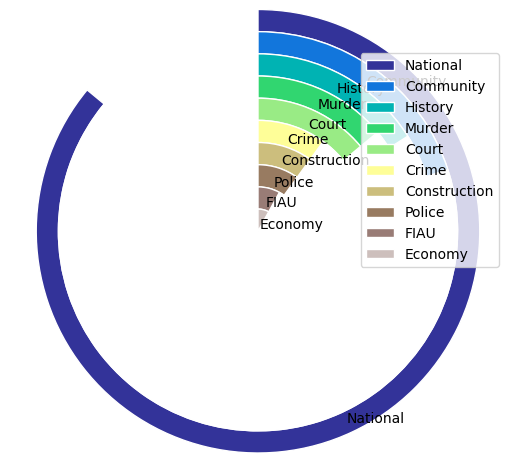

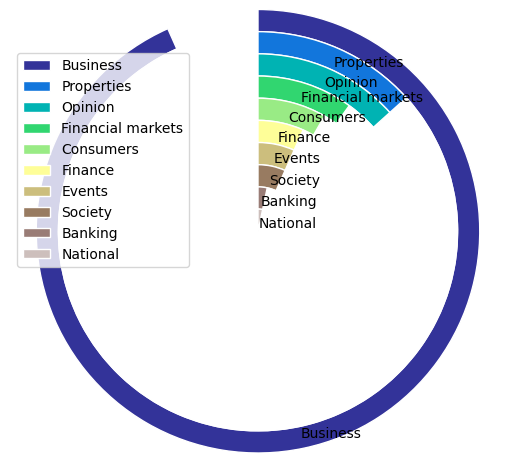

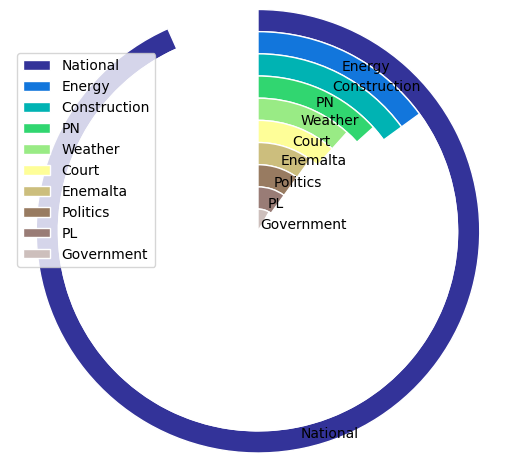

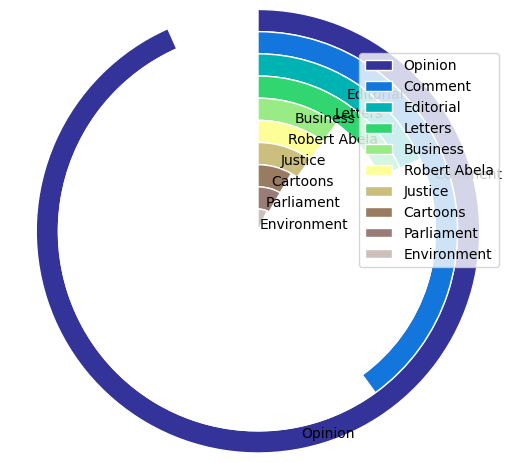

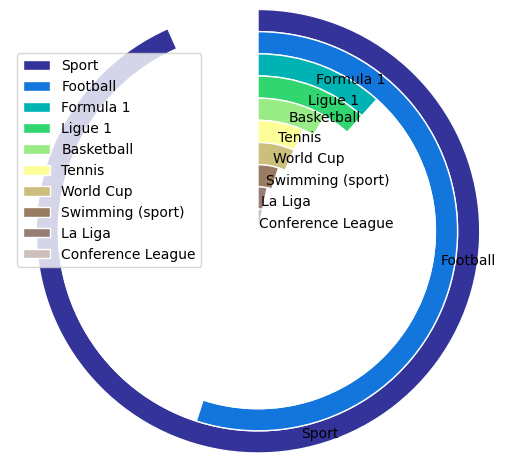

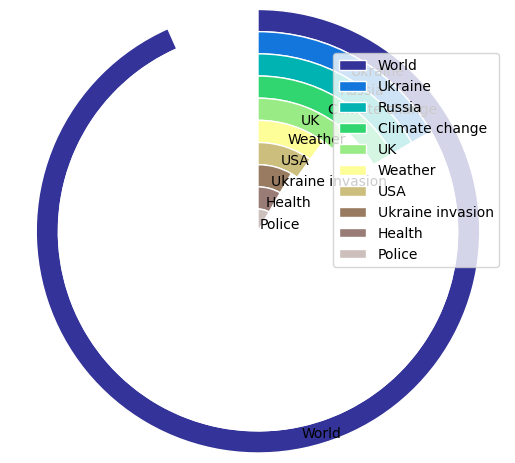

In [18]:
for key in articleInformation.keys():
    displayRadialChart(articleInformation[key][0:10])